In [ ]:
import torch


x = torch.FloatTensor( # float32 형태. 
    [
        [-0.6577, -0.5797, 0.6360],
        [0.7392, 0.2145, 1.523],
        [0.2432, 0.5662, 0.322]
    ]
)

x, x.dtype

(tensor([[-0.6577, -0.5797,  0.6360],
         [ 0.7392,  0.2145,  1.5230],
         [ 0.2432,  0.5662,  0.3220]]),
 torch.float32)

In [ ]:
x = torch.DoubleTensor( # float64 형태. 
    [
        [-0.6577, -0.5797, 0.6360],
        [0.7392, 0.2145, 1.523],
        [0.2432, 0.5662, 0.322]
    ]
)
x, x.dtype

(tensor([[-0.6577, -0.5797,  0.6360],
         [ 0.7392,  0.2145,  1.5230],
         [ 0.2432,  0.5662,  0.3220]], dtype=torch.float64),
 torch.float64)

# torch의 경우 자료형을 float64, float32, int64, int32 등 여러 구현이 가능함
- 모델을 구성할 때 정밀도를 위해선 자료형과 메모리를 고려하여 설계한다

# Batch Normalization 배치 정규화
- **내부 공변량 변화(함께 변화하는 양; Internal Covariate Shift)** 를 줄여서 과(대)적합을 방지하는 기술
    - 인공신경망을 학습할 때 입력 값을 배치 단위로 나누어 학습을 진행
    - 배치 단위로 나누어 학습하는 경우 상위 계층의 매개변수가 갱신될 때 마다 현재 계층에 전달되는 데이터의 분포도 변화
    - 각 계층은 배치 단위의 데이터로 인해 계속 변화되는 입력 분포를 학습해야 되기 때문에 인공신경망의 성능과 안정성이 낮아져 학습 속도가 느려짐
    - 내부 공변량 변화란 계층마다 입력 분포가 변경되는 현상을 의미
    - 내부 공변량 변화가 발생하는 경우 은닉층에서 다음 은닉층으로 전달될 때 입력 값이 균일하지 않아 가중치가 제대로 갱신되지 않을 수 있음
    - 이로 인해 학습이 불안정하고 느려져 가중치가 일정한 값으로 수렴하기 어려움
    - 게다가 초기 가중치 값에 민감해져 일반화하기 어려워져 더 많은 학습데이터를 요구하게 됨
    - 이러한 문제를 해결하기 위해 각 계층에 배치 정규화를 적용

**[참고자료]**</br>
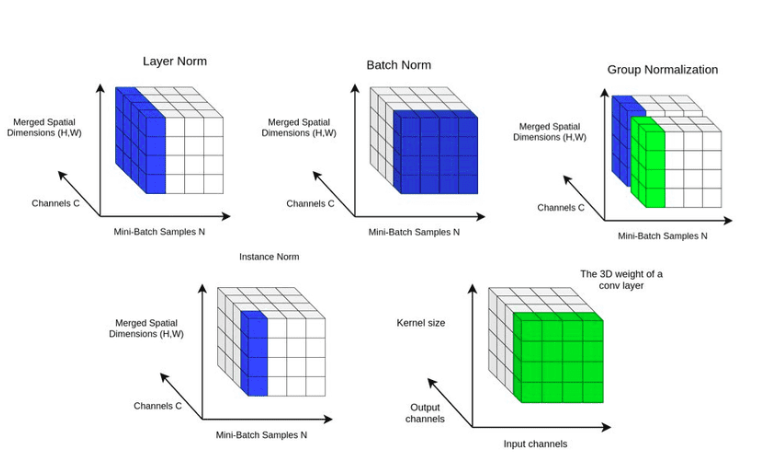

In [ ]:
import torch
from torch import nn


x = torch.FloatTensor(
    [
        [-0.6577, -0.5797, 0.6360],
        [0.7392, 0.2145, 1.523],
        [0.2432, 0.5662, 0.322]
    ]
)
print("기존 x 텐서의 평균값 :",x.mean())
print()
print("="*50)
print("배치 정규화")
print()
print(nn.BatchNorm1d(3)(x)) # nn.BatchNorm1d(num_features) : feature의 개수 혹은 채널의 수
print()
print("배치 정규화 이후 x 텐서의 평균값 :",nn.BatchNorm1d(3)(x).mean())

기존 x 텐서의 평균값 : tensor(0.3341)

배치 정규화

tensor([[-1.3246, -1.3492, -0.3756],
        [ 1.0912,  0.3077,  1.3685],
        [ 0.2334,  1.0415, -0.9930]], grad_fn=<NativeBatchNormBackward0>)

배치 정규화 이후 x 텐서의 평균값 : tensor(-3.9736e-08, grad_fn=<MeanBackward0>)


**[참고자료]**</br>
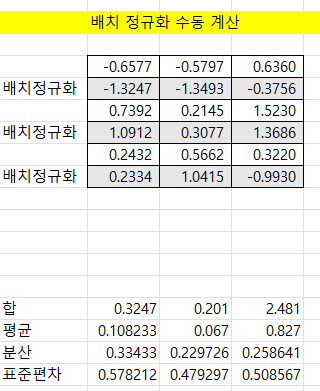
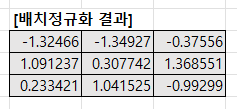
</br>
- 값의 계산 : **(원본 - 피쳐평균) / 피쳐표준편차**

공부할 때 아래 링크를 활용하면 좋을 듯</br>
http://machinelearningkorea.com/

# 가중치 초기화
- 신경망 가중치는 난수를 생성하여 초기화 해 사용
- 이 때 난수는 가우시안 분포에서 추출하거나 균등 분포에서 추출하기도 함

### 가중치의 종류
- 아래 자료 참고
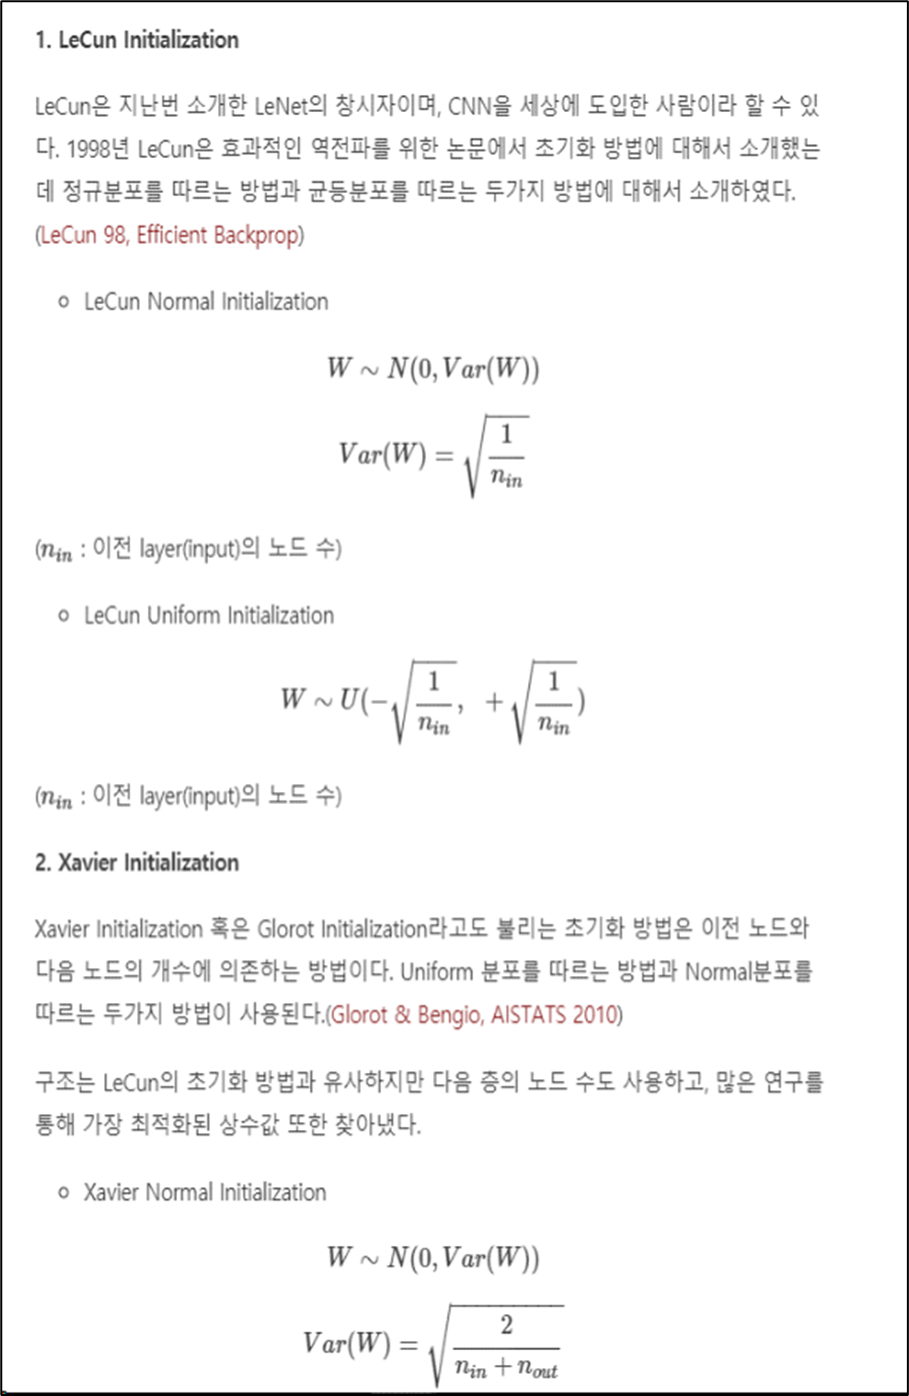<br>
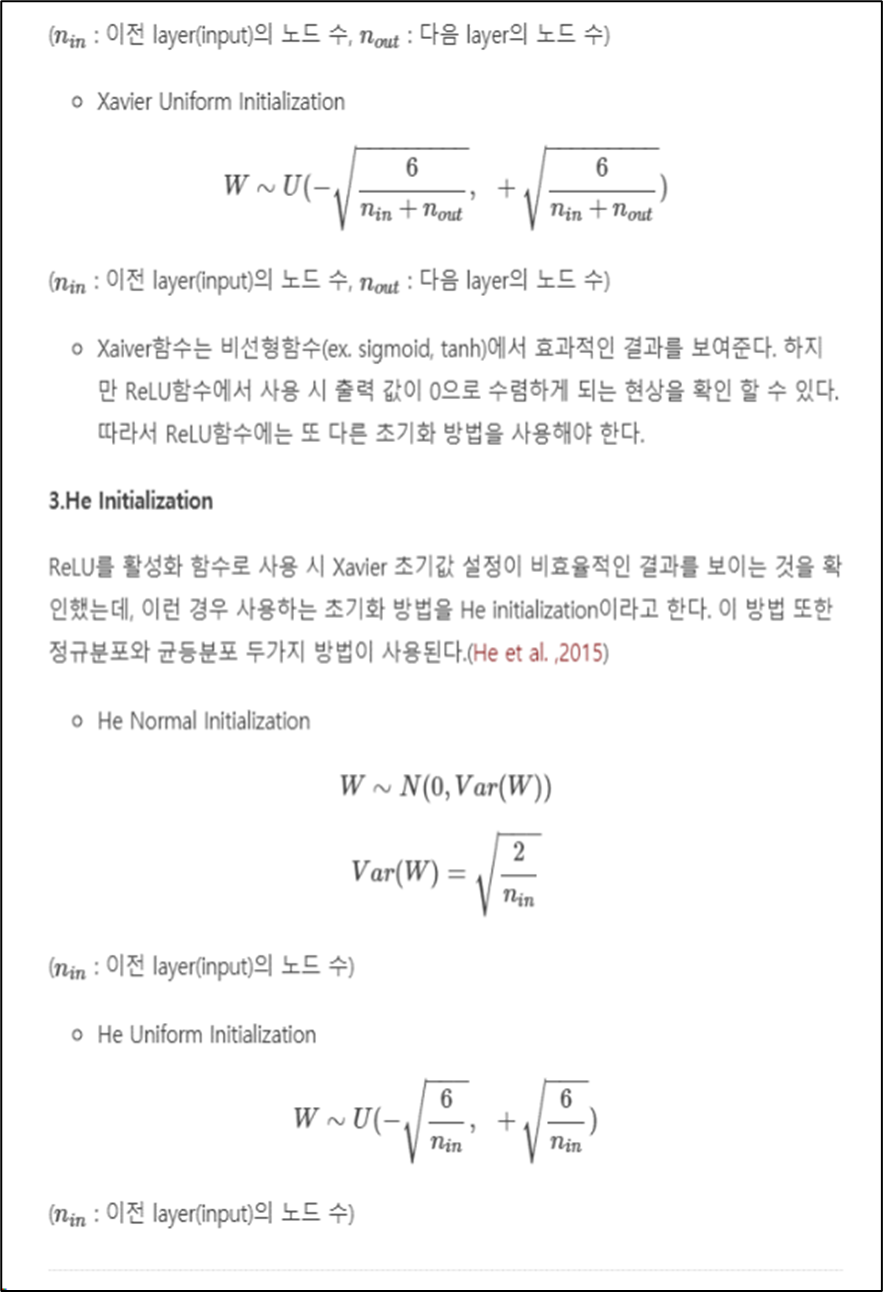

In [16]:
from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(2, 1)
        self._init_weights()

    def _init_weights(self):
        nn.init.xavier_uniform_(self.layer[0].weight)
        self.layer[0].bias.data.fill_(0.01)

        nn.init.xavier_uniform_(self.fc.weight)
        self.fc.bias.data.fill_(0.01)


model = Net()

In [17]:
model

Net(
  (layer): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): Sigmoid()
  )
  (fc): Linear(in_features=2, out_features=1, bias=True)
)

In [18]:
from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(2, 1)
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            nn.init.constant_(module.bias, 0.01)
        print(f"Apply : {module}")


model = Net()

model

Apply : Linear(in_features=1, out_features=2, bias=True)
Apply : Sigmoid()
Apply : Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
)
Apply : Linear(in_features=2, out_features=1, bias=True)
Apply : Net(
  (layer): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): Sigmoid()
  )
  (fc): Linear(in_features=2, out_features=1, bias=True)
)


Net(
  (layer): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): Sigmoid()
  )
  (fc): Linear(in_features=2, out_features=1, bias=True)
)

# 정직화(regulation)
- L1(라쏘), L2(미쯔)

### L1 규제 => 라쏘, 올가미 형태로 사용

In [ ]:
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)

    _lambda = 0.5
    l1_loss = sum(p.abs().sum() for p in model.parameters())

    loss = criterion(output, y) + _lambda * l1_loss

### L2 규제 => 미쯔, 제곱값을 활용

In [ ]:
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)

    _lambda = 0.5
    l2_loss = sum(p.pow(2.0).sum() for p in model.parameters())

    loss = criterion(output, y) + _lambda * l2_loss

# DropOut 적용
- 과적합을 방지하기 위해서 몇 개의 파라미터 전원을 dropout 한다는 의미

In [19]:
from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 10)
        self.dropout = nn.Dropout(p=0.5)
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.dropout(x)
        x = self.layer2(x)
        return x

# 그래디언트 클리핑
- **기울기가 발산하는 것을 방지하는 기술**
    - 과적합 모델의 특징 중 하나는 특정 노드의 가중치가 너무 크다는 특징을 갖음
    - 높은 가중치는 높은 분산 값을 갖게 해 모델 성능 저하
    - 이러한 현상을 방지하기 위해 가중치 최대값을 규제해 최대 임계값을 초과하지 않도록 기울기를 잘라(Clipping) 설정한 임계값으로 변환

In [ ]:
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)
    
    optimizer.zero_grad()
    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)

    optimizer.step()